# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Romir Anand

**ID**: ra493

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [12]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/hw1-romir-a`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [13]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings
using Statistics

In [14]:
# this sets a random seed, which ensures reproducibility of random number generation.
# You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

Modification made : changed min_value = 0 to min_value = array[1]

In [15]:

function minimum(array)
    min_value = array[1] #obtain first value of array and set it to min_value
    for i in 1:length(array) 
        # check if each value in array is less than the first value
        if array[i] < min_value
            # if true, set the min_value to the new, lesser value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

Modifications: called the function and imported the 'Statistics'
package so that mean() is defined

In [16]:

student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end


@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

Modificiations: syntax error: changed to zeros() not zero(). Changed the sum of the passadieci to be >= 11 from >11 since to win you must get
at least an 11 as stated in the problem.

In [138]:

function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 

    return roll
end

# generate a blank array of 1000 values
n_trials = 1_000
outcomes = zeros(n_trials)

# calculate number of successes
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) >= 11)

end

#find the win probabilty
win_prob = sum(outcomes) / n_trials # compute average number of wins

@show win_prob;

win_prob = 0.52


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [18]:
# mystery_function takes an input array (values) of numeric values and returns an array of the unique elements of values

function mystery_function(values)
    y = [] #create blank array for storing unique values
    for v in values 
        if !(v in y) #checks if each value in values is in the array of unique values
            append!(y, v) # add value to y if not already in y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


In [90]:
# The unqiue!() function could be used here

function mystery_function(values)
    unique!(values)
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = [1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.



In [136]:
# Problem 3

function compute_mean(v)
    return sum(v)/length(v) #calculating the mean
end

random_vect = rand(10) #generating random vector of 10 elements
sub =  random_vect .- compute_mean(random_vect)  #subtracting mean of v from v
@show compute_mean(round.(sub)) # checking that mean of sub = 0, rounding needed due to numerical precision

compute_mean(round.(sub)) = 0.0


0.0

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

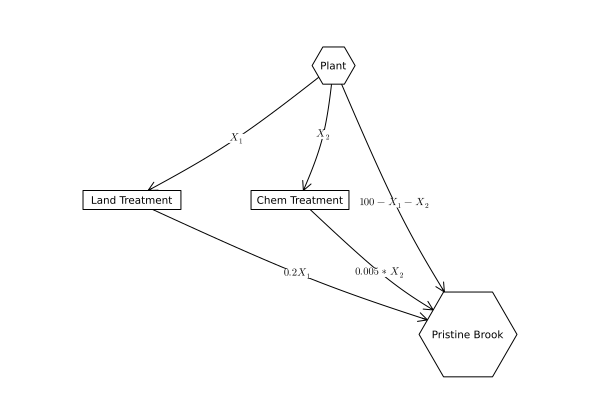

In [84]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"100-X_1-X_2",(2, 4) => L"0.2X_1",(3, 4) => L"0.005*X_2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

### Deriving the Model

First we find the mass of YUK entering the Pristine Brook from each Treatment system where $X_1$ is the amount of Wastewater entering the Land Treatment and $X_2$ is the amount of wastewater entering the Chemical Treatment

Land Treatment: 

$$M_{land} = X_1 * C * 0.2$$

Chem Treatment:

$$M_{chem} = X_2^2 * C * 0.005$$

No Treatment:

$$ M_{direct} = (100 - X_1 - X_2)*C $$


Then we need to find the total cost of for each Treatment system

Cost Land Treatment:

$$ Cost{Land} = (X_1^2)/20 $$

Cost Chem Treatment:

$$ Cost_{Chem} = (1.5*X_2) $$

Totals:

$$ Total_{YUK} = M_{land} + M_{chem} + M_{none} $$

$$ Total_{Cost} = Cost_{land} + Cost_{chem} $$

output = calculate_waste.(Q, C, x_1, x_2) = [(500.0, 20.0), (350.0, 18.0), (60.0, 68.0), (170.0, 26.0), (170.0, 34.5), (240.0, 20.0)]


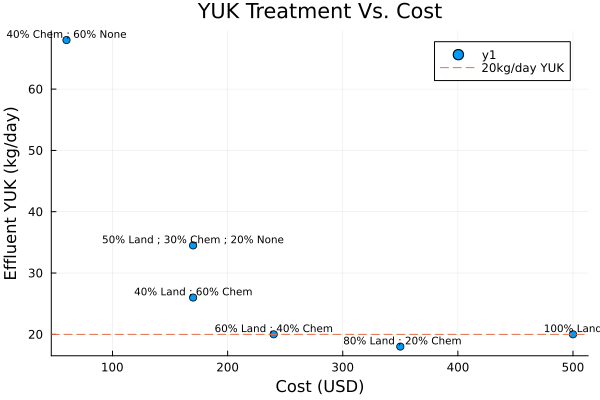

In [126]:
# the function calculate_waste() finds the amount of YUK that gets dumped in Pristine River given a
# set of proportions of wastewater that is directed to either Land or chemical treatment and also returns 
# the cost of treatment. 

function calculate_waste(Q, C, p_x1, p_x2)
    
    # calculating the amount of wastewater per method where Q is the total effluent wastewater
    X1 = p_x1 * Q
    X2 = p_x2 * Q
    
    # calculating cost per method
    cost_x1 = (X1^2) / 20
    cost_x2 = 1.5 * X2

    # calculating the amount of YUK per method
    m_x1 = X1 * C * 0.2
    m_x2 = (X2^2) * C * 0.005
    m_x3 = (100 - X1 - X2) * C

    # calculating total yuk and total cost to remediate yuk 
    total_yuk = m_x1 + m_x2 + m_x3
    total_cost = cost_x1 + cost_x2

    return (total_cost, total_yuk)

end


Q = 100 #100 m^3/ day of wastewater
C = 1 # 1 kg/m^3 YUK in wastewater

# create vectors of possible proportions 
x_1 = [1, 0.8, 0, 0.4, 0.5, 0.6] # list of proportions of ww sent to land treatment
x_2 = [0, 0.2, 0.4, 0.6, 0.3, 0.4] # list of proportions of ww sent to chem treatment

labels = ["100% Land", " 80% Land ; 20% Chem", "40% Chem ; 60% None", "40% Land ; 60% Chem", "50% Land ; 30% Chem ; 20% None", "60% Land ; 40% Chem"]

@show output = calculate_waste.(Q, C, x_1, x_2)

# plotting scatter with labels
plot(output; st=:scatter, series_annotations = text.(labels,:bottom,7))
hline!([20], linestyle=:dash, label="20kg/day YUK")

xlabel!("Cost (USD)")
ylabel!("Effluent YUK (kg/day)")
title!("YUK Treatment Vs. Cost")

Upon inspection of the scatter plot, we can see that it is possible to get at or below the regulated limit of YUK effluent in Pristine Brook. However, all of the combinations of treatment systems found that achive this have limit have none of the wastewater getting directly dumped into the brook. The costs of these treatment combinations vary greatly with, but those combinations that contain higher proportions of untreated wastewater. The best solution found were proportions of of 60% Land based treatment and 40% chemical based treatment, as this combination reached the upper limit of 20 kg/day YUK and was the cheapest solution as well at $240 per day. These proportions were found by playing around with the numbers entered into the function. Note this number was not optimised and is only obtained from trial and error and may not be the best solution.


### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

In [46]:
sum([isodd(i) for i in 0:1:149])

75

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

In [60]:
function polynomial(x,a)
    sum = 0 #set variable to store summation as 0
    for (i,j) in enumerate(a) 

        point = j*(x^i) # calculate each term of the polynomial
        sum = sum + point
    end
    return sum
end

polynomial(2,[2,-1,1])

2
-1
1


8

## References
 
https://discourse.julialang.org/t/mark-each-scatter-point-uniquely/58803/4 for scatter plot labeling and formatting

Consulted with Lily Blyn (llb229) and Ava Slade (aes372) with how to approach the models for Question 4.